# WeatherPy

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import API keys
import wkey

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding latitude, longitude and cities
latitude_longitude = []
cities = []

# Create a set of random latitude and longitude combinations
Latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
Longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)
latitude_longitude = zip(Latitude, Longitude)

# Identify nearest city for each latitude and longitude combinations
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

764

In [8]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "25bc90a1196e6f153eece0bc0b0fc9eb"
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"

In [9]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial'

In [12]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chokurdakh
Processing Record 2 of Set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kruisfontein
Processing Record 3 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari
Processing Record 4 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hobart
Processing Record 5 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bluff
Processing Record 6 of Set 1 | ossora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ossora
Processing Record 7 of Set

Processing Record 3 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nikolskoye
Processing Record 4 of Set 2 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=souillac
Processing Record 5 of Set 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=belushya%20guba
City not found...
Processing Record 6 of Set 2 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=qaqortoq
Processing Record 7 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ilulissat
Processing Record 8 of Set 2 | el sauzal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=el%20sauzal
Processing Record 9 of Set 2 | temaraia
http://a

Processing Record 6 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sentyabrskiy
City not found...
Processing Record 7 of Set 3 | khani
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=khani
Processing Record 8 of Set 3 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chuy
Processing Record 9 of Set 3 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tuktoyaktuk
Processing Record 10 of Set 3 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mar%20del%20plata
Processing Record 11 of Set 3 | bellegarde-sur-valserine
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bellegarde-sur-valserine
Processing Record 12 o

Processing Record 7 of Set 4 | balacita
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=balacita
Processing Record 8 of Set 4 | luena
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luena
Processing Record 9 of Set 4 | patitirion
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=patitirion
Processing Record 10 of Set 4 | olga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=olga
Processing Record 11 of Set 4 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santa%20fe
Processing Record 12 of Set 4 | zeya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zeya
Processing Record 13 of Set 4 | westport
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a

Processing Record 10 of Set 5 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=samarai
Processing Record 11 of Set 5 | galeana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=galeana
Processing Record 12 of Set 5 | salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=salinopolis
Processing Record 13 of Set 5 | portland
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=portland
Processing Record 14 of Set 5 | matamoros
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=matamoros
Processing Record 15 of Set 5 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sabang
Processing Record 16 of Set 5 | krasnoselkup
http://api.openweathermap.org/data/2.

City not found...
Processing Record 12 of Set 6 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kavieng
Processing Record 13 of Set 6 | cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabedelo
Processing Record 14 of Set 6 | kristianstad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kristianstad
Processing Record 15 of Set 6 | sangueya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sangueya
Processing Record 16 of Set 6 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mahebourg
Processing Record 17 of Set 6 | torrington
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=torrington
Processing Record 18 of Set 6 | berdigestyakh
http:/

Processing Record 15 of Set 7 | zigong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zigong
Processing Record 16 of Set 7 | palembang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=palembang
Processing Record 17 of Set 7 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kemijarvi
City not found...
Processing Record 18 of Set 7 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vangaindrano
Processing Record 19 of Set 7 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lakes%20entrance
Processing Record 20 of Set 7 | camalu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=camalu
Processing Record 21 of Set 7 | pitmoaga
http:

Processing Record 18 of Set 8 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bubaque
Processing Record 19 of Set 8 | sosva
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sosva
Processing Record 20 of Set 8 | penzance
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=penzance
Processing Record 21 of Set 8 | tay ninh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tay%20ninh
Processing Record 22 of Set 8 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santiago%20del%20estero
Processing Record 23 of Set 8 | nusaybin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nusaybin
Processing Record 24 of Set 8 | panjab
http://api.openweatherm

Processing Record 21 of Set 9 | kumo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kumo
Processing Record 22 of Set 9 | conakry
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=conakry
Processing Record 23 of Set 9 | prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=prince%20rupert
Processing Record 24 of Set 9 | vryburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vryburg
Processing Record 25 of Set 9 | yuancheng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yuancheng
City not found...
Processing Record 26 of Set 9 | ambon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ambon
Processing Record 27 of Set 9 | lethem
http://api.openweathermap.org

Processing Record 24 of Set 10 | kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kodinsk
Processing Record 25 of Set 10 | ayagoz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ayagoz
Processing Record 26 of Set 10 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=huarmey
Processing Record 27 of Set 10 | parrita
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=parrita
Processing Record 28 of Set 10 | ca mau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ca%20mau
Processing Record 29 of Set 10 | dafeng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dafeng
Processing Record 30 of Set 10 | henties bay
http://api.openweathermap.org/data/2.5/weather?

Processing Record 27 of Set 11 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yar-sale
Processing Record 28 of Set 11 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saldanha
Processing Record 29 of Set 11 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tezu
Processing Record 30 of Set 11 | macusani
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=macusani
Processing Record 31 of Set 11 | tumut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tumut
Processing Record 32 of Set 11 | barra do garcas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barra%20do%20garcas
Processing Record 33 of Set 11 | lufilufi
http://api.openweathermap.org/

Processing Record 30 of Set 12 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lavrentiya
Processing Record 31 of Set 12 | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=haibowan
City not found...
Processing Record 32 of Set 12 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bandarbeyla
Processing Record 33 of Set 12 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=viedma
Processing Record 34 of Set 12 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=porto%20novo
Processing Record 35 of Set 12 | magistralnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=magistralnyy
Processing Record 36 of Set 12 | fulin

Processing Record 33 of Set 13 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nantucket
Processing Record 34 of Set 13 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=comodoro%20rivadavia
Processing Record 35 of Set 13 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20patricio
Processing Record 36 of Set 13 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ornskoldsvik
Processing Record 37 of Set 13 | ilam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ilam
Processing Record 38 of Set 13 | xuddur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=xuddur
Processing Record 39 of Set 13 | gushikawa
htt

Processing Record 36 of Set 14 | bijie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bijie
Processing Record 37 of Set 14 | gopichettipalaiyam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gopichettipalaiyam
City not found...
Processing Record 38 of Set 14 | la paz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=la%20paz
Processing Record 39 of Set 14 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tevaitoa
Processing Record 40 of Set 14 | booue
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=booue
Processing Record 41 of Set 14 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rio%20grande
Processing Record 42 of Set 14 | ormara
http:/

Processing Record 39 of Set 15 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=umm%20kaddadah
Processing Record 40 of Set 15 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20policarpo
Processing Record 41 of Set 15 | dabhol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dabhol
Processing Record 42 of Set 15 | paoua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=paoua
Processing Record 43 of Set 15 | lodja
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lodja
Processing Record 44 of Set 15 | khorramshahr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=khorramshahr
Processing Record 45 of Set 15 | rajnagar
http://api.openweath

In [15]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          688
Cloudiness    688
Country       688
Date          688
Humidity      688
Lat           688
Lng           688
Max Temp      688
Wind Speed    688
dtype: int64

In [16]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chokurdakh,12,RU,1521441114,30,70.62,147.90,-20.54,3.94
1,kruisfontein,76,ZA,1521441114,91,-34.00,24.73,66.94,18.03
2,butaritari,36,KI,1521441115,100,3.07,172.79,83.14,7.85
3,hobart,75,AU,1521438240,42,-42.88,147.33,62.60,18.34
4,bluff,0,AU,1521441116,42,-23.58,149.07,91.42,9.08


## Latitude vs Temperature (F)

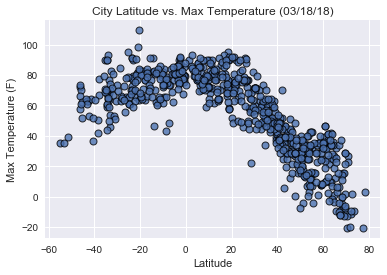

In [27]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs Humidity (%)

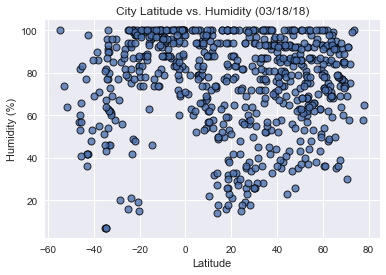

In [28]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%)

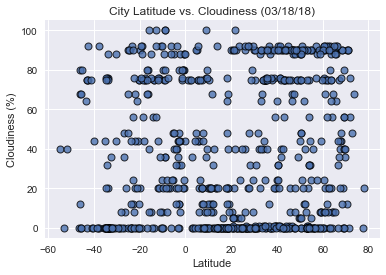

In [29]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs Wind Speed (mph)

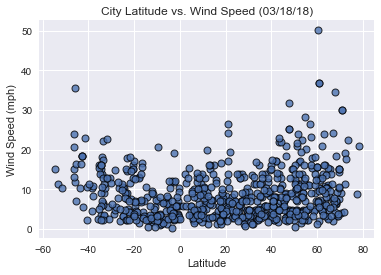

In [30]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()